In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Inspecting the data


In [232]:
df = pd.read_csv('data.csv')
df.head(10)

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,30669,Male,3.0,0,0,No,Rural,95.12,18.0,NaN,0
1,1,30468,Male,58.0,1,0,Yes,Urban,87.96,39.2,never smoked,0
2,2,16523,Female,8.0,0,0,No,Urban,110.89,17.6,NaN,0
3,3,56543,Female,70.0,0,0,Yes,Rural,69.04,35.9,formerly smoked,0
4,4,46136,Male,14.0,0,0,No,Rural,161.28,19.1,NaN,0
5,5,32257,Female,47.0,0,0,Yes,Urban,210.95,50.1,NaN,0
6,6,52800,Female,52.0,0,0,Yes,Urban,77.59,17.7,formerly smoked,0
7,7,41413,Female,75.0,0,1,Yes,Rural,243.53,27.0,never smoked,0
8,8,15266,Female,32.0,0,0,Yes,Rural,77.67,32.3,smokes,0
9,9,28674,Female,74.0,1,0,Yes,Urban,205.84,54.6,never smoked,0


# What are our questions?

Is there any significant relationship between different features and CVA? 

Can we predict occurance of CVA based on these features?(Using machine learning)

We can see that there are considerible amount of Null values in 'smoking_status' column.
There are also some Null values in 'bmi column.

In [233]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         43400 non-null  int64  
 1   id                 43400 non-null  int64  
 2   gender             43400 non-null  object 
 3   age                43400 non-null  float64
 4   hypertension       43400 non-null  int64  
 5   heart_disease      43400 non-null  int64  
 6   ever_married       43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.0+ MB
None


In [234]:
df.smoking_status.value_counts(dropna = False)

never smoked       16053
NaN                13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

Removing Null values from 'smoking_status' column.

In [235]:
df = df.dropna(subset = ['smoking_status'])

# Investingating Categorical Variables




In [236]:
df.gender.value_counts()

Female    18366
Male      11733
Other         9
Name: gender, dtype: int64

There are just 9 observations with gender as 'Other', so it's better to remove these observations.

In [237]:
df = df[df.gender != 'Other' ]

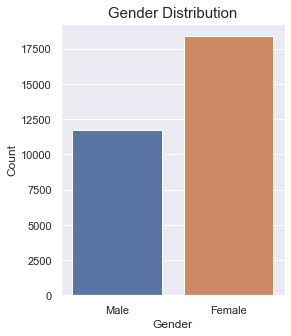

In [238]:
plt.figure(figsize=(4,5))
sns.countplot(data =df,x ='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution',size = 15)
plt.show()

In [239]:
df.ever_married.value_counts()

Yes    22548
No      7551
Name: ever_married, dtype: int64

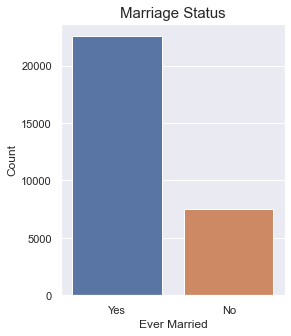

In [240]:
plt.figure(figsize=(4,5))
sns.countplot(data =df,x ='ever_married')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.title('Marriage Status',size = 15)
plt.show()

In [241]:
print(df.Residence_type.value_counts())

Urban    15122
Rural    14977
Name: Residence_type, dtype: int64


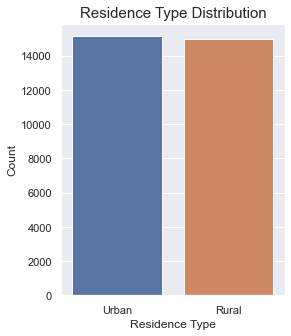

In [242]:
plt.figure(figsize=(4,5))
sns.countplot(data =df,x ='Residence_type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.title('Residence Type Distribution',size = 15)
plt.show()

In [243]:
df.heart_disease.value_counts()

0    28421
1     1678
Name: heart_disease, dtype: int64

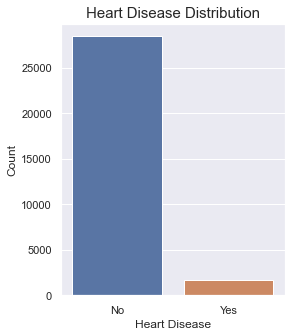

In [244]:
plt.figure(figsize=(4,5))
ax = plt.subplot()
sns.countplot(data =df,x ='heart_disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease Distribution',size = 15)
ax.set_xticklabels(['No','Yes'])
plt.show()

In [245]:
df.hypertension.value_counts()

0    26571
1     3528
Name: hypertension, dtype: int64

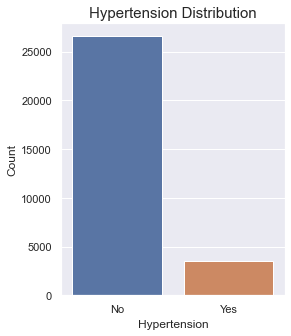

In [246]:
plt.figure(figsize=(4,5))
ax = plt.subplot()
sns.countplot(data =df,x ='hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Hypertension Distribution',size = 15)
ax.set_xticklabels(['No','Yes'])
plt.show()

In [247]:
df.smoking_status.value_counts()

never smoked       16051
formerly smoked     7487
smokes              6561
Name: smoking_status, dtype: int64

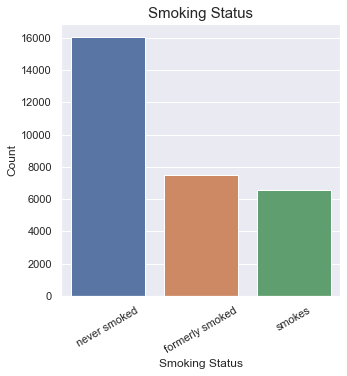

In [248]:
plt.figure(figsize=(5,5))
sns.countplot(data =df,x ='smoking_status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status',size = 15)
plt.xticks(rotation = 30)
plt.show()

Maybe it's better to merge 'formerly smoked' with 'smokes', because smoking effects remain for many years.

In [249]:
df.smoking_status = df.smoking_status.map({'formerly smoked':'Yes','smokes':'Yes','never smoked':'No'})

In [250]:
df.smoking_status.value_counts()

No     16051
Yes    14048
Name: smoking_status, dtype: int64

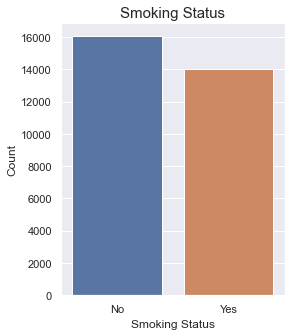

In [251]:
plt.figure(figsize=(4,5))
sns.countplot(data =df,x ='smoking_status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status',size = 15)
plt.show()

In [252]:
df.stroke.value_counts()

0    29461
1      638
Name: stroke, dtype: int64

Only about 2% of our target data had CVA and this is a very imbalanced data

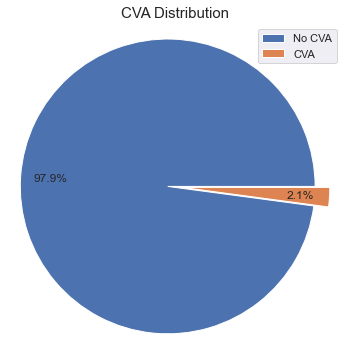

In [253]:
plt.figure(figsize =(6,6))
plt.pie(df.stroke.value_counts(),
       autopct = '%0.1f%%',
       explode =(0,0.1),
       pctdistance = 0.8)
plt.axis('equal')
plt.legend(['No CVA', 'CVA'])
plt.title('CVA Distribution', size =15)
plt.show()

# Investigating Numerical Features




Here you can see mean,std, etc. for our numerical data. 
As you can see, it seems that we have some outliers, for instance max bmi is equal to 92, so let's investigate them more

In [254]:
df[['age','bmi','avg_glucose_level']].describe()

,age,bmi,avg_glucose_level
count,30099.000000,29065.000000,30099.00000
mean,47.940197,30.054684,107.19366
std,18.750826,7.193951,45.96763
min,10.000000,10.100000,55.01000
25%,33.000000,25.000000,77.84000
50%,48.000000,28.900000,92.40000
75%,62.000000,33.900000,114.50000
max,82.000000,92.000000,291.05000


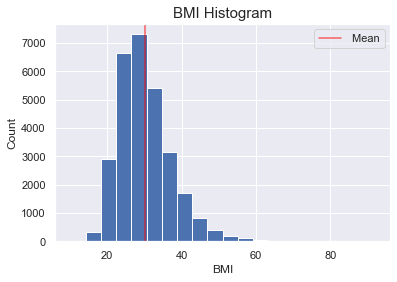

In [255]:
plt.hist(df.bmi, bins= 20)
plt.axvline( x = df.bmi.mean() , c = 'red', label = ' Mean', alpha = 0.6)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Histogram',size = 15)
plt.legend()
plt.show()

As it's obvious, we have a lot of outlier in the BMI column and they are likely incorrect. 

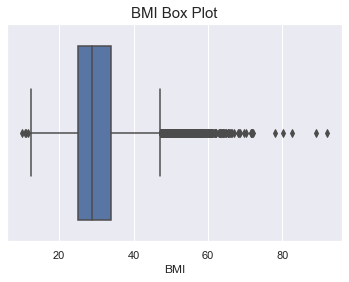

In [256]:
sns.boxplot(x =df.bmi)
plt.xlabel('BMI')
plt.title('BMI Box Plot',size = 15)
plt.show()

A BMI level below 13 can be life-threatening and a BMI level over 50 doesn't look correct. So, we should remove those observations

In [257]:
df = df[(df['bmi']<=45)&(df['bmi']>=13)]

Glucose histogram is right-skwed and also bimodal, the second peak probably is related  to people with Diabetes Melitus.

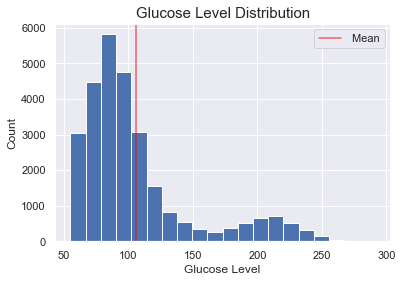

In [258]:
plt.hist(df.avg_glucose_level, bins= 20)
plt.axvline( x = df.avg_glucose_level.mean() , c = 'red', label = ' Mean', alpha = 0.6)
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.title('Glucose Level Distribution',size = 15)
plt.legend()
plt.show()

As it's clear, we have a lot of outlier in the Glucose level column, but these observations look completely correct. 
As I mentioned before these outliers could be related  to people with Diabetes Melitus and they could carry important info.

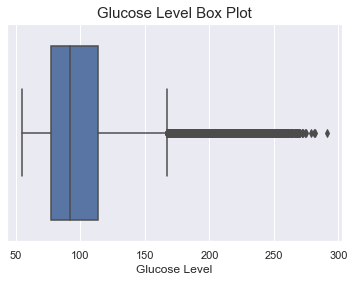

In [259]:
sns.boxplot(x =df.avg_glucose_level)
plt.xlabel('Glucose Level')
plt.title('Glucose Level Box Plot',size = 15)
plt.show()

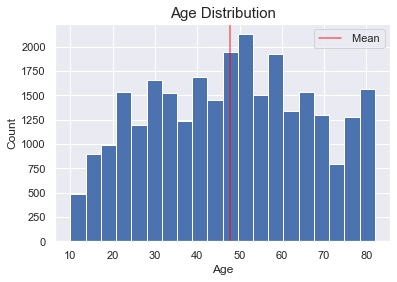

In [260]:
plt.hist(df.age, bins= 20)
plt.axvline( x = df.age.mean() , c = 'red', label = ' Mean', alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution',size = 15)
plt.legend()
plt.show()

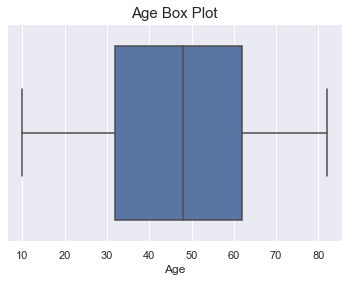

In [261]:
sns.boxplot(x =df.age)
plt.xlabel('Age')
plt.title('Age Box Plot',size = 15)
plt.show()

# Relationship between numerical variables and CVA

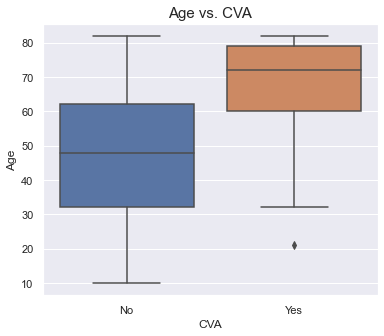

In [262]:
plt.figure(figsize=(6,5))
ax = plt.subplot()
sns.boxplot(data =df ,x ='stroke',y = 'age')
plt.xlabel('CVA')
plt.ylabel('Age')
plt.title('Age vs. CVA',size = 15)
ax.set_xticklabels(['No','Yes'])
plt.show()

There is a big difference between CVA group with non-CVA group in age distribution, let's test it to make sure

In [263]:
from scipy.stats import ttest_ind

In [264]:
tstat, pval = ttest_ind(df[df['stroke']==0].age,df[df['stroke']==1].age)
print(pval)

1.7014553937205305e-150


As you can see, there is a strong relationship between age and CVA 

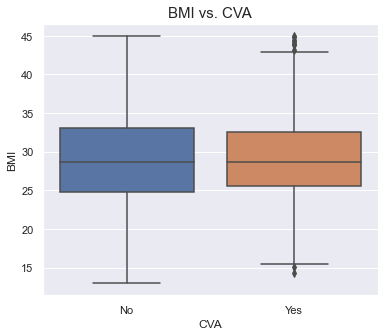

In [265]:
plt.figure(figsize=(6,5))
ax = plt.subplot()
sns.boxplot(data =df ,x ='stroke',y = 'bmi')
plt.xlabel('CVA')
plt.ylabel('BMI')
plt.title('BMI vs. CVA',size = 15)
ax.set_xticklabels(['No','Yes'])
plt.show()

The distribution of both groups looks pretty much the same, let's test it

In [266]:
tstat, pval = ttest_ind(df[df['stroke']==0].bmi,df[df['stroke']==1].bmi)
print(pval)

0.8548425596274629


As you can see there is no significant relationship between BMI and CVA

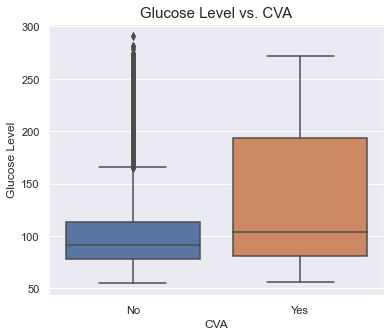

In [267]:
plt.figure(figsize=(6,5))
ax = plt.subplot()
sns.boxplot(data =df ,x ='stroke',y = 'avg_glucose_level')
plt.xlabel('CVA')
plt.ylabel('Glucose Level')
plt.title('Glucose Level vs. CVA',size = 15)
ax.set_xticklabels(['No','Yes'])
plt.show()

the CVA group has more spread distribution and higher mean in glucose level. let's test it to see if there is a significant relationship

In [268]:
tstat, pval = ttest_ind(df[df['stroke']==0].avg_glucose_level,df[df['stroke']==1].avg_glucose_level)
print(pval)

1.1068655054940418e-37


There is a strong relationship between average glucose level and CVA 

# Relationship between categorical variables and CVA

In [269]:
x1 = pd.crosstab(df.stroke, df.gender)
print(x1)
print('Male: '+ str(round((x1.iloc[1].Male/(x1.iloc[1].Male+x1.iloc[0].Male))*100,1))+'%')
print('Female: '+ str(round((x1.iloc[1].Female/(x1.iloc[1].Female+x1.iloc[0].Female))*100,1))+'%')

gender  Female   Male
stroke               
0        16772  10672
1          303    230
Male: 2.1%
Female: 1.8%


The CVA occurance is slightly higher in male population

In [270]:
from scipy.stats import chi2_contingency

In [271]:
chi2,pval,dof,expected = chi2_contingency(x1)
print(pval, chi2)

0.050566491130978206 3.822574308231023


There is no strong significant relationship between gender and CVA

In [272]:
x2 = pd.crosstab(df.stroke, df.hypertension)
print(x2)
print('HTN: '+ str(round((x2.iloc[1:,1:].values[0][0]/(x2.iloc[1:,1:].values[0][0] + x2.iloc[:1,1:].values[0][0]))*100,1))+'%')
print('NO-HTN: '+ str(round((x2.iloc[1:,:1].values[0][0]/(x2.iloc[1:,:1].values[0][0] + x2.iloc[:1,:1].values[0][0]))*100,1))+'%')

hypertension      0     1
stroke                   
0             24568  2876
1               379   154
HTN: 5.1%
NO-HTN: 1.5%


More than 5% of the people with HTN had CVA, but it's only 1.5% in NO_HTN population

In [273]:
chi2,pval,dof,expected = chi2_contingency(x2)
print(pval, chi2)

2.1005466502114012e-41 181.66298459270206


There is a significant relationship between HTN and CVA

In [274]:
x3 = pd.crosstab(df.stroke, df.heart_disease)
print(x3)
print('Heart Disease: '+ str(round((x3.iloc[1:,1:].values[0][0]/(x3.iloc[1:,1:].values[0][0] + x3.iloc[:1,1:].values[0][0]))*100,1))+'%')
print('NO-Heart Disease: '+ str(round((x3.iloc[1:,:1].values[0][0]/(x3.iloc[1:,:1].values[0][0] + x3.iloc[:1,:1].values[0][0]))*100,1))+'%')

heart_disease      0     1
stroke                    
0              26089  1355
1                415   118
Heart Disease: 8.0%
NO-Heart Disease: 1.6%


8% of the people with heart disease had CVA, but it's only 1.6% in people without heart diseae.


In [275]:
chi2,pval,dof,expected = chi2_contingency(x3)
print(pval, chi2)

1.127657257184071e-68 306.7272782792508


There is a significant relationship between HTN and CVA

In [276]:
x4 = pd.crosstab(df.stroke, df.Residence_type)
print(x4)
print('Urban: '+ str(round((x4.iloc[1].Urban/(x4.iloc[1].Urban + x4.iloc[0].Urban))*100,1))+'%')
print('Rural: '+ str(round((x4.iloc[1].Rural/(x4.iloc[1].Rural + x4.iloc[0].Rural))*100,1))+'%')

Residence_type  Rural  Urban
stroke                      
0               13658  13786
1                 261    272
Urban: 1.9%
Rural: 1.9%


In [277]:
chi2,pval,dof,expected = chi2_contingency(x4)
print(pval, chi2)

0.7478119359341944 0.10337886369241159


There is no relationship between residence type and CVA

In [278]:
x5 = pd.crosstab(df.stroke, df.ever_married)
print(x5)
print('Married: '+ str(round((x5.iloc[1].Yes/(x5.iloc[1].Yes + x5.iloc[0].Yes))*100,1))+'%')
print('Never Married: '+ str(round((x5.iloc[1].No/(x5.iloc[1].No + x5.iloc[0].No))*100,1))+'%')

ever_married    No    Yes
stroke                   
0             7105  20339
1               55    478
Married: 2.3%
Never Married: 0.8%


In [279]:
chi2,pval,dof,expected = chi2_contingency(x5)
print(pval, chi2)

5.126029503592556e-16 65.74731733973857


There is a significant relationship between marital status and CVA, but is this a good feature for our predictor? let's investigate it more.

In [280]:
x6 = pd.crosstab(df.stroke, df.smoking_status)
print(x6)

smoking_status     No    Yes
stroke                      
0               14925  12519
1                 247    286


In [281]:
print('Smoked: '+ str(round((x6.iloc[1:,1:].values[0][0]/(x6.iloc[1:,1:].values[0][0] + x6.iloc[:1,1:].values[0][0]))*100,1))+'%')
print('Never smoked: '+ str(round((x6.iloc[1:,:1].values[0][0]/(x6.iloc[1:,:1].values[0][0] + x6.iloc[:1,:1].values[0][0]))*100,1))+'%')

Smoked: 2.2%
Never smoked: 1.6%


In [282]:
chi2,pval,dof,expected = chi2_contingency(x6)
pval, chi2

(0.00026523220299004725, 13.301229002227027)

We can see that there is a significant relationship between smoking and CVA

# Preprocssing

It's necessary to encode categorical variables in order to use them in a machine learning model

In [283]:
df.smoking_status = df.smoking_status.map({'Yes':1,'No':0})
df.Residence_type = df.Residence_type.map({'Urban':1,'Rural':0})
df.ever_married = df.ever_married.map({'Yes':1,'No':0})
df.gender = df.gender.map({'Male':1,'Female':0})

In [284]:
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,30468,1,58.0,1,0,1,1,87.96,39.2,0,0
3,3,56543,0,70.0,0,0,1,0,69.04,35.9,1,0
6,6,52800,0,52.0,0,0,1,1,77.59,17.7,1,0
7,7,41413,0,75.0,0,1,1,0,243.53,27.0,0,0
8,8,15266,0,32.0,0,0,1,0,77.67,32.3,1,0


In [285]:
X = df.drop(columns= ['stroke','Unnamed: 0','id'])
y = df['stroke']

In [286]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

# Splitting the data 

In [287]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size = 0.2,random_state = 10)

# Dealing with imbalanced data

As I mentioned before, only about 2% of our data had CVA and our data is very imbalanced

Here is what hapens if we do not implement resampling:

In [288]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter =1000)

In [289]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Train Data Accuracy: ' + str(round(model.score(x_train,y_train),3)))
print('Test Data Accuracy: ' + str(round(model.score(x_test,y_test),3)))
from sklearn.metrics import roc_auc_score
print('Auc-roc score: ' + str(round(roc_auc_score(y_test,y_pred),3)))
Y_pred = model.predict(x_train)

Train Data Accuracy: 0.982
Test Data Accuracy: 0.978
Auc-roc score: 0.5


As you can see our accuracy is very high, but it's not reliable beacause only 2% of our target data had CVA and a guess that no patients had CVA have an accuracy of 98%, , so let's fix that with oversampling.

In [290]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 10)
x_under,y_under = sampler.fit_resample(x_train,y_train)

In [291]:
print(x_under.shape)
print(y_under.shape)

(43940, 9)
(43940,)


# Importing and fitting the model

In [293]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter =1000)

In [294]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [298]:
model.fit(x_under,y_under)
y_pred = model.predict(x_test)
print('Train Data Accuracy: ' + str(round(model.score(x_under,y_under),3)))
print('Test Data Accuracy: ' + str(round(model.score(x_test,y_test),3)))
from sklearn.metrics import roc_auc_score
print('Auc-roc score: ' + str(round(roc_auc_score(y_test,y_pred),3)))
train_pred = model.predict(x_under)
print('Mean Squared Error on Train Data ' + str(round(mean_squared_error(y_under,train_pred),3)))
print('Mean Squared Error on Test Data ' + str(round(mean_squared_error(y_test,y_pred),3)))
print('......................................................................................')
print(classification_report(y_test,y_pred))

Train Data Accuracy: 0.783
Test Data Accuracy: 0.751
Auc-roc score: 0.741
Mean Squared Error on Train Data 0.217
Mean Squared Error on Test Data 0.249
......................................................................................
              precision    recall  f1-score   support

           0       0.99      0.75      0.86      5474
           1       0.06      0.73      0.11       122

    accuracy                           0.75      5596
   macro avg       0.53      0.74      0.48      5596
weighted avg       0.97      0.75      0.84      5596



Comparing mean squared error and accuracy on train and test data shows that our model is not overfitted.

Here, I used all the features to fit the model, but we saw earlier that some of the features have no realtionship with our target value at all, so the question is:

Can we have the same accuracy our even better with removing some of the features?

# Feature Selection

I decided to use a wrapper method called Recrusice Feature Elimination 

In [299]:
from sklearn.feature_selection import RFE
rfe = RFE(model,n_features_to_select = 5)

In [300]:
rfe.fit(x_under,y_under)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [301]:
print(rfe.ranking_)
print(rfe.support_)

[3 1 1 2 1 4 1 5 1]
[False  True  True False  True False  True False  True]


In [302]:
x_under = x_under[:,[1,2,3,6,8]]
x_test = x_test[:,[1,2,3,6,8]]

In [304]:
model.fit(x_under,y_under)
y_pred = model.predict(x_test)
print('Train Data Accuracy: ' + str(round(model.score(x_under,y_under),3)))
print('Test Data Accuracy: ' + str(round(model.score(x_test,y_test),3)))
from sklearn.metrics import roc_auc_score
print('Auc-roc score: ' + str(round(roc_auc_score(y_test,y_pred),3)))
train_pred = model.predict(x_under)
print('Mean Squared Error on Train Data ' + str(round(mean_squared_error(y_under,train_pred),3)))
print('Mean Squared Error on Test Data ' + str(round(mean_squared_error(y_test,y_pred),3)))
print('......................................................................................')
print(classification_report(y_test,y_pred))

Train Data Accuracy: 0.783
Test Data Accuracy: 0.753
Auc-roc score: 0.745
Mean Squared Error on Train Data 0.217
Mean Squared Error on Test Data 0.247
......................................................................................
              precision    recall  f1-score   support

           0       0.99      0.75      0.86      5474
           1       0.06      0.74      0.12       122

    accuracy                           0.75      5596
   macro avg       0.53      0.75      0.49      5596
weighted avg       0.97      0.75      0.84      5596



# Conclusion

Our model's accuracy turned to be 0.75 and auc-roc score is almost 0.75

I managed to remove 4 redundant features and  have the same performance only with 5 features.  